# はじめてのPythonとOpenCVによる画像処理


## cv2パッケージの内容確認

In [ ]:
import cv2
print(cv2.getBuildInformation())

## 画像の型の確認

In [1]:
import cv2
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
type(gimg)

numpy.ndarray

カラー画像として読んでサイズおよびチャネル数の確認

In [2]:
cimg = cv2.imread('sample.png')
cimg.shape

(184, 309, 3)

## Matplotlibを使った画像の表示
カラーの場合とグレースケールの場合でimshowに渡す形式およびオプションが異なる。また，複数画像を表示したい場合にはfigure関数を使うのがシンプル。ここでは例として，画像を読んだうえで，ボケさせた結果を表示している。

※通常はコメントしてあるmatplotlib inline宣言をするのだが，後でnbaggを使う際，matplotlibの出力を切り替えるとトラブルが起きやすいので全てnbaggにしている。**nbaggは出力のセルがスクロールできない問題があるが，出力セルの左横をクリックすると全体が表示できる。**

<IPython.core.display.Javascript object>


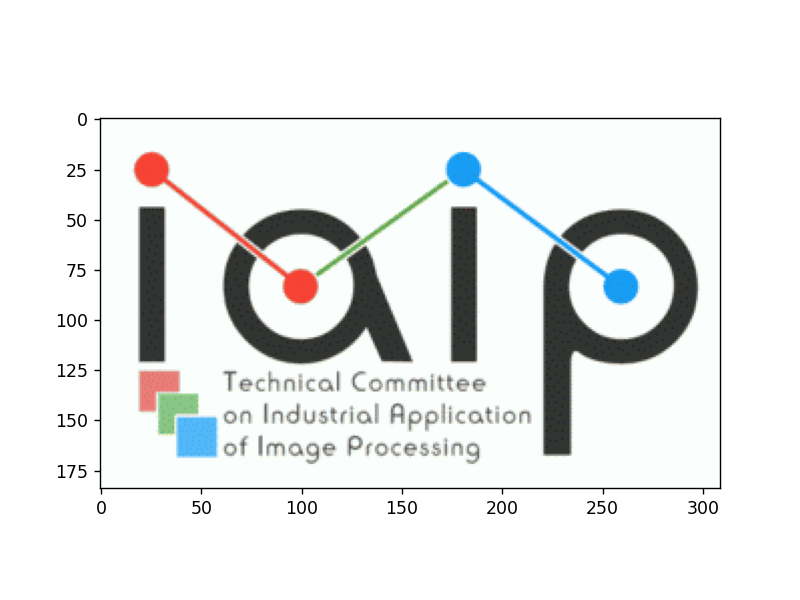

<IPython.core.display.Javascript object>


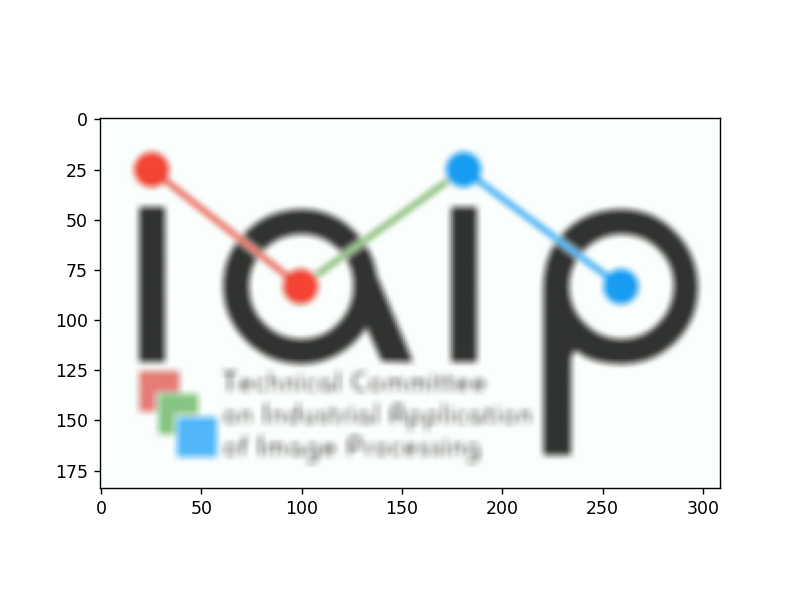

<IPython.core.display.Javascript object>


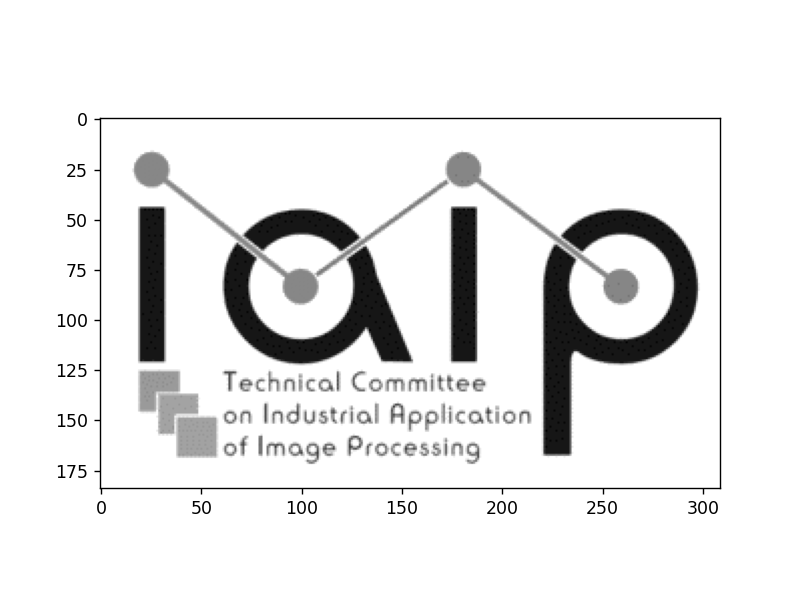

<IPython.core.display.Javascript object>


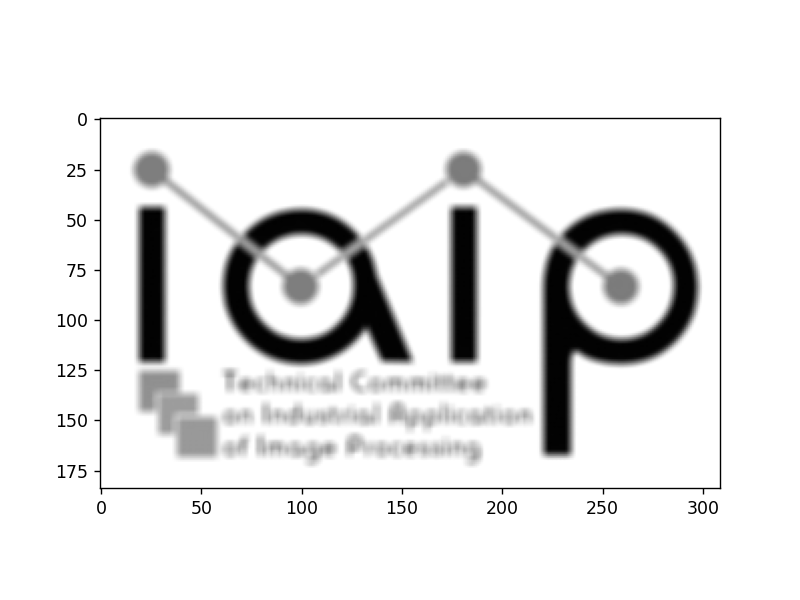

In [4]:
%matplotlib nbagg
# %matplotlib inline
import cv2
import matplotlib.pyplot as plt
# カラーの場合
cimg = cv2.imread('sample.png')
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
cdst = cv2.GaussianBlur(cimg, (5,5), 3)
plt.figure()
plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB))
# グレースケールの場合
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(gimg, cmap='gray')
dst = cv2.GaussianBlur(gimg, (5,5), 3)
plt.figure()
plt.imshow(dst, cmap='gray');

## (オプション) Matplotlibで日本語表示
ネット上で様々な方法が紹介されているが，pip経由でjapanize-matplotlibを入れることもできる。(仮想環境で1度だけ実行すれば良い)

In [ ]:
!pip install japanize-matplotlib

下記は上のセルを実行した後でないと大量の警告と共にトーフ文字が表示される。
違いはjapanize_matplotlibをimportするだけ。

<IPython.core.display.Javascript object>


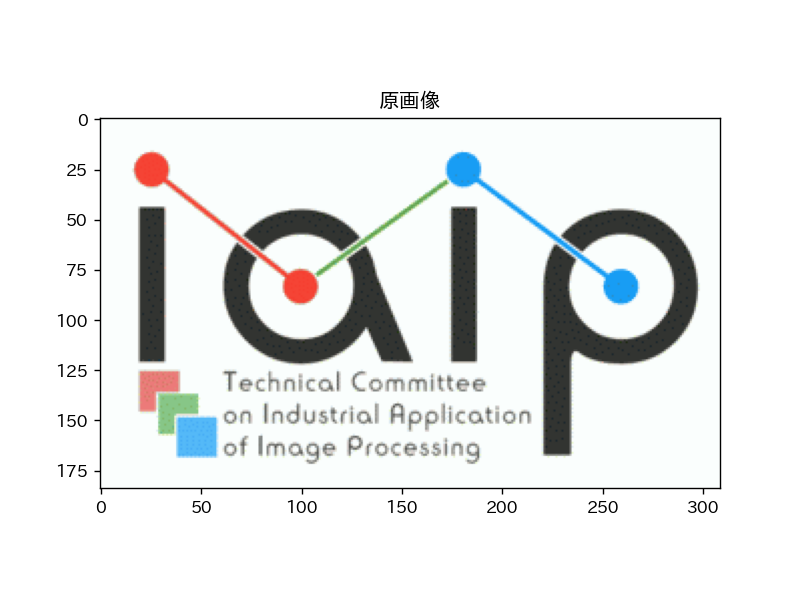

<IPython.core.display.Javascript object>


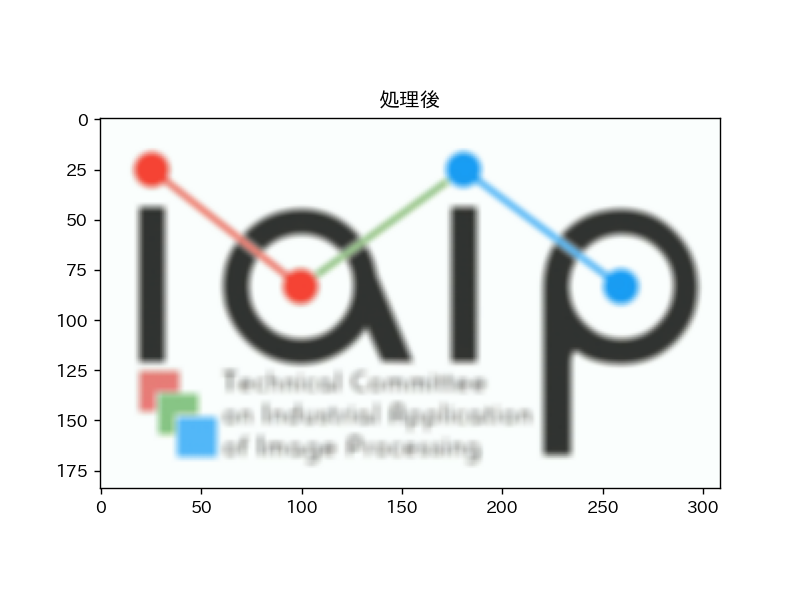

In [6]:
%matplotlib nbagg
import cv2
import matplotlib.pyplot as plt
import japanize_matplotlib # この一行を追記する
# カラーの場合
cimg = cv2.imread('sample.png')
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.title('原画像')
cdst = cv2.GaussianBlur(cimg, (5,5), 3)
plt.figure()
plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB))
plt.title('処理後');


## 動画像を生成して保存する方法
imgsを使って後でインラインアニメーション表示をする

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
imgs = np.zeros((250,300,1), dtype=np.uint8)
# fourccは処理系依存
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#グレースケールの場合は最後の引数が必要
out = cv2.VideoWriter('test.mp4', fourcc, 25.0, (300,250),0) 
# 媒介変数を使って○を回転させる
for t in range(400):
    newimg = np.zeros((250,300), dtype=np.uint8)
    x = 150 + np.int(100*np.cos(0.02*np.pi * t ))
    y = 125 - np.int(100*np.sin(0.04*np.pi * t))
    cv2.circle(newimg, (x, y), 5, (255, 0, 0), -1)
    # 画像を時系列方向にスタックする
    imgs = np.dstack([imgs, newimg])
    out.write(newimg)
out.release()

IPythonのVideo関数で，保存した動画像をインライン再生できる筈だが相性問題が大きい。

In [ ]:
from IPython.display import Video
Video('test.mp4')

## インラインでシーケンシャルな画像を表示する
nbaggを使う。コールバック関数 animate_funcで情報を更新する仕組み

<IPython.core.display.Javascript object>


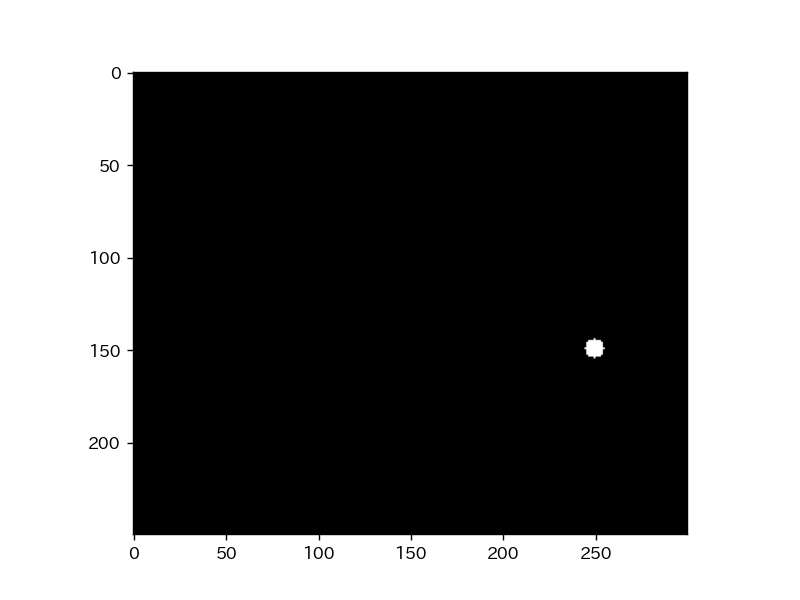

In [8]:
%matplotlib nbagg
from matplotlib.animation import FuncAnimation
fig = plt.figure()
im = plt.imshow(imgs[:,:,0], cmap='gray', vmin=0, vmax=255)
def animate_func(i):
    im.set_data(imgs[:,:,i])
    return im,
anim = FuncAnimation(fig, animate_func, interval=50, 
                     frames=200, blit=True, repeat=False)
plt.show()

## nbaggの応用でカメラの映像を連続表示する
更新する関数(animate_func)の中でフレームを取得すれば良いだけなので仕組みとしては簡単。カメラを使ったプログラムの開発もfpsを気にしないならこれでできる。fpsを考慮する必要があるなら動画で保存して，VideoCaptureで読み出せば良い。

<IPython.core.display.Javascript object>


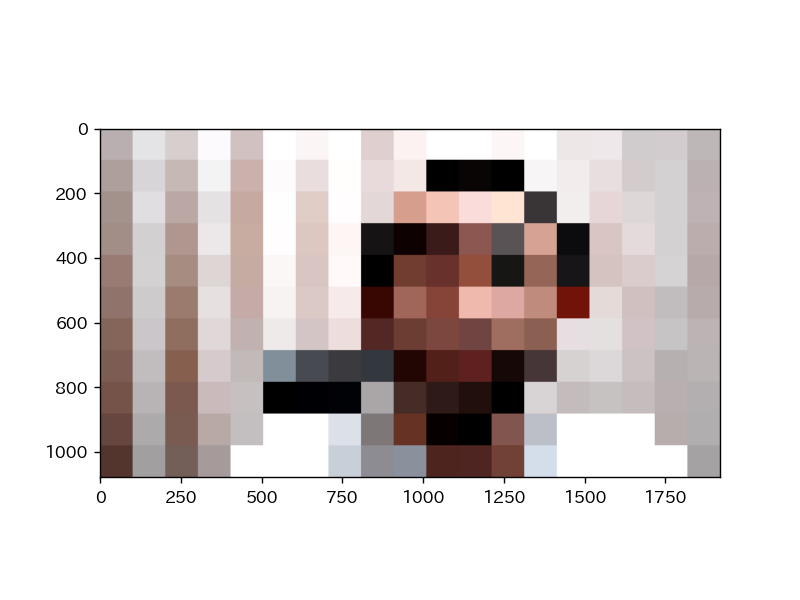

In [11]:
%matplotlib nbagg
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
cap = cv2.VideoCapture(0)
ret = False
while (not(ret)):
    ret, capimg = cap.read()
fig = plt.figure()
im = plt.imshow(cv2.cvtColor(capimg, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
def animate_func(i):
    ret, capimg = cap.read()
    # ここで処理をしてtmpに結果を入れる
    tmp = cv2.resize(capimg, dsize=None, fx=1/100.0, fy=1/100.0, interpolation=cv2.INTER_NEAREST)
    tmp = cv2.resize(tmp, dsize=None, fx=100.0, fy=100.0, interpolation=cv2.INTER_NEAREST)
    rgbimg = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    im.set_data(rgbimg)
    return im,
anim = FuncAnimation(fig, animate_func, interval=50, frames=range(50), blit=True, repeat=False)
plt.show()


セルでの実行結果と表示は非同期で動くので cap.releaseを上のセル内で実行してしまうと，直ぐにキャプチャが止まってしまう。

In [69]:
cap.release()